Objective :Prepare a classification model using Naive Bayes for salary data 

In [47]:
"""
Created on 5th Aug 2020
@author: Shilpa Chavan
Algorithm : Naive Bayes Algorithm
Dataset : SalaryData_Train.csv
"""
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Load the Data

In [2]:
# Reading the Salary Data 
salary_train = pd.read_csv("D:\\Shilpa\\Datascience\\Assignments\\Naive Bayes\\SalaryData_Train.csv")
salary_test = pd.read_csv("D:\\Shilpa\\Datascience\\Assignments\\Naive Bayes\\SalaryData_Test.csv")

# Exploratory data analysis

In [3]:
salary_train.shape 
# there are 30161 observations and 14 attributes in the data set.

(30161, 14)

In [4]:
salary_train.head() #First 5 records 

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
#View summary of training dataset
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
# Exploring the categorical variables
salary_train.select_dtypes('object').head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [8]:
salary_train.workclass.value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [10]:
salary_train.education.value_counts()

 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

In [14]:
salary_train.maritalstatus.value_counts()

 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

In [15]:
salary_train.occupation.value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [16]:
salary_train.relationship.value_counts()

 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      888
Name: relationship, dtype: int64

In [17]:
salary_train.race.value_counts()

 White                 25932
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64

In [18]:
salary_train.sex.value_counts()

 Male      20380
 Female     9781
Name: sex, dtype: int64

In [19]:
salary_train.native.value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 Italy                            68
 China                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Taiwan                           42
 Haiti                            42
 Iran                             42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [63]:
# check missing values in categorical variables
salary_train.select_dtypes('object').isnull().sum()

Salary    0
dtype: int64

There are no missing values in categorical variables of salary training data.

In [21]:
#Exploring the numerical variables
salary_train.select_dtypes('int64').head()
#So there are 5 discrete numerical variables.

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [22]:
# checking missing values in numerical variables
salary_train.select_dtypes('int64').isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

There are no missing values in numerical variables of salary training data.

# Data pre-processing

In [24]:
string_columns=["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]
from sklearn import preprocessing
for i in string_columns:
    number = preprocessing.LabelEncoder()
    salary_train[i] = number.fit_transform(salary_train[i])
    salary_test[i] = number.fit_transform(salary_test[i])

# Training and Test dataset

In [64]:
colnames = salary_train.columns
colnames
len(colnames[0:13])
trainX = salary_train[colnames[0:13]]
trainY = salary_train[colnames[13]]
testX  = salary_test[colnames[0:13]]
testY  = salary_test[colnames[13]]
#trainX
#trainY

# Model Training and Evaluation using Gaussian Classifier

In [65]:
#Create a Gaussian Classifier
sgnb = GaussianNB()
#Train the model using the training sets
spred_gnb = sgnb.fit(trainX,trainY)
spred_gnb

#Predict the response for test dataset
y_pred = spred_gnb.predict(testX)
#y_pred
#confusion_matrix(testY,spred_gnb)

In [66]:
#print ("Accuracy",(10759+1209)/(10759+601+2491+1209))
print("Accuracy score:",metrics.accuracy_score(testY, y_pred)) 

print(classification_report(testY, y_pred))

Accuracy score: 0.7946879150066402
              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87     11360
        >50K       0.67      0.33      0.44      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.64      0.66     15060
weighted avg       0.78      0.79      0.77     15060



# Model Training and Evaluation using Multinomial Naive Bayes Classifier

In [67]:
smnb = MultinomialNB()
spred_mnb = smnb.fit(trainX,trainY)
#spred_mnb
#Predict the response for test dataset
y_pred_mnb = spred_mnb.predict(testX)

In [68]:
print("Accuracy score",(10891+780)/(10891+780+2920+780))

print(classification_report(testY, y_pred_mnb))

Accuracy score 0.7592869689675362
              precision    recall  f1-score   support

       <=50K       0.79      0.96      0.87     11360
        >50K       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



# ROC Curve

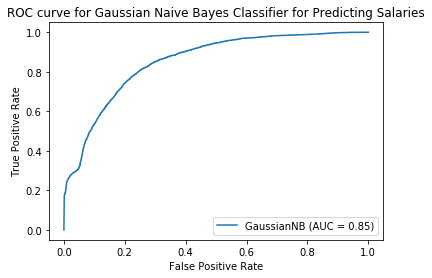

In [61]:
metrics.plot_roc_curve(spred_gnb, testX, testY)  
    
plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')
plt.show()   

ROC AUC of model approaches towards 1(AUC=0.85). So, we can conclude that our Gaussian Classifier does good in 
predicting salary with accuracy score of 79%.